## Q1.  Max heap

Implement a max heap instead of a min heap, by having the constructor explicitly pass the "comparison" operator in. Replace `min` and `del_min` by `dominant` and `del_dominant` methods. Change the classmethods to also take in the operator.

In [58]:
#your code here

class BinaryHeap:
    def __init__(self, operator, storage=None):
        if storage:
            self.storage = [None]+list(storage)
            self.upto = len(storage)
        else:
            self.storage=[None]
            self.upto = 0
        self.operator = operator
        
    @classmethod
    def heapify_slow(cls, it, operator, storage=None):
        inst = cls(operator, storage)
        for i in it:
            inst.insert(i)
        return inst
       
    @classmethod
    def heapify(cls,it,operator, storage=None):
        inst = cls(operator, storage)
        inst.storage = inst.storage + list(it)
        fromhalfway = (len(inst.storage) - 1) // 2
        inst.upto = len(inst.storage) - 1
        counter = 0
        while (fromhalfway > 0):
            counter += 1
            inst.sift_down(fromhalfway)
            fromhalfway -= 1
        return inst
        
        
    def insert(self, value):
        self.storage.append(value)
        self.upto += 1
        self.sift_up(self.upto)

    def sift_up(self, i):
        parent = i // 2
        if parent > 0 and self.operator(self.storage[i], self.storage[parent]):
            self.storage[i], self.storage[parent] = self.storage[parent], self.storage[i]
            self.sift_up(parent)
     
    def _dom_child(self, i):
        if 2*i + 1 > self.upto:
            return 2*i
        else:
            if self.operator(self.storage[2*i], self.storage[2*i+1]):
                return 2*i
            else:
                return 2*i + 1
    
    def sift_down(self, i):
        if 2*i <= self.upto:
            child = self._dom_child(i)
            if self.operator(self.storage[child], self.storage[i]):
                self.storage[child], self.storage[i] = self.storage[i], self.storage[child]
                self.sift_down(child)
        
    def dominant(self):
        return self.storage[1]
    
    def del_dominant(self):
        dominant = self.storage[1]
        self.storage[1], self.storage[self.upto] = self.storage[self.upto], self.storage[1]
        self.storage.pop()
        self.upto -= 1
        self.sift_down(1)
        return dominant

Lets use your code to find the minimum as well as the maximum of the old array. Run the code in the following cells and make sure you did it right...

In [59]:
data = [1,8,5,9,23,2,45,6,7,99,-5]

In [60]:
from operator import gt, lt
bh = BinaryHeap.heapify(data, lt)
print(bh.storage)
bh.dominant()

[None, -5, 1, 2, 6, 8, 5, 45, 9, 7, 99, 23]


-5

In [61]:
bh = BinaryHeap.heapify(data, gt)
print(bh.storage)
bh.dominant()

[None, 99, 23, 45, 9, 8, 2, 5, 6, 7, 1, -5]


99

## Q2. Heapsort

Heapsort is an algorithm that takes the idea of the selection sort algorithm and replces the inner loop by the use of a max-heap.

In [37]:
def selection_sort(A):
    for i in range(len(A)):
        print("<<<",A)
        min_index = i
        for j in range(i+1, len(A)):
            if A[j] < A[min_index]:
                min_index = j
        A[i], A[min_index] = A[min_index], A[i]
        print(">>>",A)

In [38]:
selection_sort(data)

<<< [1, 8, 5, 9, 23, 2, 45, 6, 7, 99, -5]
>>> [-5, 8, 5, 9, 23, 2, 45, 6, 7, 99, 1]
<<< [-5, 8, 5, 9, 23, 2, 45, 6, 7, 99, 1]
>>> [-5, 1, 5, 9, 23, 2, 45, 6, 7, 99, 8]
<<< [-5, 1, 5, 9, 23, 2, 45, 6, 7, 99, 8]
>>> [-5, 1, 2, 9, 23, 5, 45, 6, 7, 99, 8]
<<< [-5, 1, 2, 9, 23, 5, 45, 6, 7, 99, 8]
>>> [-5, 1, 2, 5, 23, 9, 45, 6, 7, 99, 8]
<<< [-5, 1, 2, 5, 23, 9, 45, 6, 7, 99, 8]
>>> [-5, 1, 2, 5, 6, 9, 45, 23, 7, 99, 8]
<<< [-5, 1, 2, 5, 6, 9, 45, 23, 7, 99, 8]
>>> [-5, 1, 2, 5, 6, 7, 45, 23, 9, 99, 8]
<<< [-5, 1, 2, 5, 6, 7, 45, 23, 9, 99, 8]
>>> [-5, 1, 2, 5, 6, 7, 8, 23, 9, 99, 45]
<<< [-5, 1, 2, 5, 6, 7, 8, 23, 9, 99, 45]
>>> [-5, 1, 2, 5, 6, 7, 8, 9, 23, 99, 45]
<<< [-5, 1, 2, 5, 6, 7, 8, 9, 23, 99, 45]
>>> [-5, 1, 2, 5, 6, 7, 8, 9, 23, 99, 45]
<<< [-5, 1, 2, 5, 6, 7, 8, 9, 23, 99, 45]
>>> [-5, 1, 2, 5, 6, 7, 8, 9, 23, 45, 99]
<<< [-5, 1, 2, 5, 6, 7, 8, 9, 23, 45, 99]
>>> [-5, 1, 2, 5, 6, 7, 8, 9, 23, 45, 99]


The basic idea is this. First heapify the entire array. The max should then be the 1st element (save our placeholder None) of the heap's storage. Swap this max with the last element to store the maximum at the end. Now you've put in some new wierd value at the top of the heap and have lost the heap property. You have an additional element at the end.

In-place in the array, without making any additional allocations, consider all but the last element to be the new "heap". What method in the heap class must we use to restore the heap property?

Use this method to sort the array. Print the before and after for each iteration of the outer loop as above. What is the $O(n)$ for this method?

In [75]:
#your code here
def heap_sort(A):
    bh = BinaryHeap.heapify(A, gt)
    for i in range(len(A), 0, -1):
        print("<<<",bh.storage)
        # Swap
        bh.storage[1], bh.storage[i] = bh.storage[i], bh.storage[1]
        # Decrease up_to
        bh.upto -= 1
        bh.sift_down(1)
        print(">>>",bh.storage)

In [76]:
heap_sort(data)

<<< [None, 99, 23, 45, 9, 8, 2, 5, 6, 7, 1, -5]
>>> [None, 45, 23, 5, 9, 8, 2, -5, 6, 7, 1, 99]
<<< [None, 45, 23, 5, 9, 8, 2, -5, 6, 7, 1, 99]
>>> [None, 23, 9, 5, 7, 8, 2, -5, 6, 1, 45, 99]
<<< [None, 23, 9, 5, 7, 8, 2, -5, 6, 1, 45, 99]
>>> [None, 9, 8, 5, 7, 1, 2, -5, 6, 23, 45, 99]
<<< [None, 9, 8, 5, 7, 1, 2, -5, 6, 23, 45, 99]
>>> [None, 8, 7, 5, 6, 1, 2, -5, 9, 23, 45, 99]
<<< [None, 8, 7, 5, 6, 1, 2, -5, 9, 23, 45, 99]
>>> [None, 7, 6, 5, -5, 1, 2, 8, 9, 23, 45, 99]
<<< [None, 7, 6, 5, -5, 1, 2, 8, 9, 23, 45, 99]
>>> [None, 6, 2, 5, -5, 1, 7, 8, 9, 23, 45, 99]
<<< [None, 6, 2, 5, -5, 1, 7, 8, 9, 23, 45, 99]
>>> [None, 5, 2, 1, -5, 6, 7, 8, 9, 23, 45, 99]
<<< [None, 5, 2, 1, -5, 6, 7, 8, 9, 23, 45, 99]
>>> [None, 2, -5, 1, 5, 6, 7, 8, 9, 23, 45, 99]
<<< [None, 2, -5, 1, 5, 6, 7, 8, 9, 23, 45, 99]
>>> [None, 1, -5, 2, 5, 6, 7, 8, 9, 23, 45, 99]
<<< [None, 1, -5, 2, 5, 6, 7, 8, 9, 23, 45, 99]
>>> [None, -5, 1, 2, 5, 6, 7, 8, 9, 23, 45, 99]
<<< [None, -5, 1, 2, 5, 6, 7, 8, 9, 23, 



We use the storage of the heap (to have an inplace operation on the array we need to set the array as the heap storage).
The outer loop contains n iteration and the inner loop sifts down an element in the heap (O(log(n)).
The total time complexity is: O(n log(n))

## Q3. Median maintenance

Median maintenance is a very cool algorithm to find an online median. 

We create two arrays to test our implementation, using `np.median` to compute our answer...

In [77]:
import random
import numpy as np

In [78]:
l = [random.randint(1,1000) for _ in range(150)]
print(len(l), np.median(l))
l2 = l + [random.randint(1,1000)]
print(len(l2), np.median(l2))

150 530.0
151 532.0


You will implement `def online_median(iterator)` which is a generaor yielding successive values of your online median. 

The algorithm is as follows:

We'll use 2 heaps, a max heap for the lower half of the data, and a min-heap for the upper half. We take the first 2values in our data and assign the smaller value to the max heap, while the larger value goes to the min-heap. Then, as we "insert" subsequent values in one of the two heaps, the following holds: if we keep the number of elements in both heaps equal (for the even case) or at-most differing by one, the median is respectively the average of the two dominants or the dominant in the heap with one xtra item.

What then is our strategy for this balanced insertion? Quite simple really: if a new value is not as dominant as the dominant value, add it to that heap. If it is more dominant, add it to the other. If two items in a row get added to the same heap, the heaps will be out of balance by more than one. In this case, take the dominant element from the larger heap and simply add it to the smaller one.

In [140]:
#your code here

def online_median(iterator):
    min_heap = BinaryHeap(lt)
    max_heap = BinaryHeap(gt)
    a = next(iterator)
    yield a
    b = next(iterator)
    yield (a + b)/2.
    
    # Inserting the two first values of the iterator
    if a <= b:
        max_heap.insert(a)
        min_heap.insert(b)
    else:
        max_heap.insert(b)
        min_heap.insert(a)
    min_val = min_heap.dominant()
    max_val = max_heap.dominant()
    # Pointer to the previous updated heap (0: min, 1: max)
    prev = 0
    for i, v in enumerate(iterator):
        # Case insertion in upper half
        if v >= min_val:
            min_heap.insert(v)
            # need to rebalance the heap
            if prev == 0:
                max_heap.insert(min_heap.del_dominant())
                prev=1
            else:
                prev = 0
        else:
            max_heap.insert(v)
            # need to rebalance the heap
            if prev == 1:
                min_heap.insert(max_heap.del_dominant())
                prev=0
            else:
                prev = 1
        # Odd number of elements case
        if i%2 == 0:
            # The previous updated heap is the larger when we have an odd number of elements
            if prev == 1:
                yield max_heap.dominant()
            else:
                yield min_heap.dominant()
        # Even number of elements case
        else:
            yield (max_heap.dominant() + min_heap.dominant())/2.
        min_val = min_heap.dominant()
        max_val = max_heap.dominant()

In [139]:
# Test to verify the correctness of our online version against numpy
om = online_median(iter(l))
for i,v in enumerate(om):
    if np.median(l[:i+1]) != v:
        print(i)

Do your answers match?

530.0


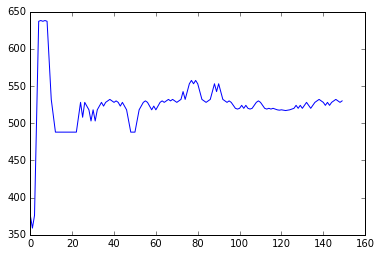

In [129]:
%matplotlib inline
import matplotlib.pyplot as plt
medians = list(online_median(iter(l)))
print(medians[-1])
plt.plot(medians)

In [134]:
list(online_median(iter(l2)))[-1]

532

# Checking the result
for i,v in enumerate(l):
    if np.median(l[:i+1])

What is the $O(n)$ behavior of this median maintenance algorithm?

If we consider only the median computation then its O(1) because we jsu thave to retrieve it.
If we consider the maintenance, i.e. the online iteration then its O(log n ) because of the insertion into the heap at each iteration.
TO compute the median at once for a list of n elements, the worst case time complexity is O(n log n)


Lastly, lets repeat the analysis we did last time on the randomly generated data.

In [131]:
from random import normalvariate, random
from itertools import count
def make_data(m, stop=None):
    for _ in count():
        if stop and _ > stop:
            break
        yield 1.0e09 + normalvariate(0, m*random() )

In [132]:
g = online_median(make_data(5, 100))
print(type(g))
out = list(g)
out[-10:]

<class 'generator'>


[999999999.9784172,
 999999999.9900156,
 999999999.997221,
 999999999.9900156,
 999999999.9784172,
 999999999.9900156,
 999999999.997221,
 1000000000.0044262,
 999999999.997221,
 1000000000.0001725]

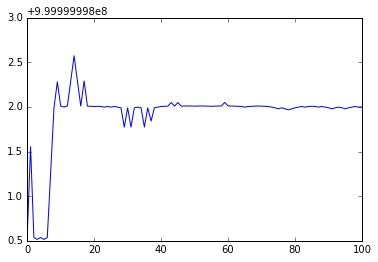

In [133]:
plt.plot(out)